# using python to adjust stls...
01/09/23

In [30]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import math
import os



In [46]:
def plot_mesh(mesh, labels=["x", "y", "z"]):
    # Create a new plot
    figure = pyplot.figure()
    axes = figure.add_subplot(projection='3d')


    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(mesh.vectors, alpha=0.4))

    axes.set_xlabel(labels[0])
    axes.set_ylabel(labels[1])
    axes.set_zlabel(labels[2])

    # Auto scale to the mesh size
    scale = mesh.points.flatten()
    axes.auto_scale_xyz(scale, scale, scale)

    # Show the plot to the screen
    pyplot.show()

In [83]:
LOCATION_PATH = "../hr12_fullScale/constant/triSurface/"
STL_PATH = os.path.join(LOCATION_PATH, "boxOriginal.stl")

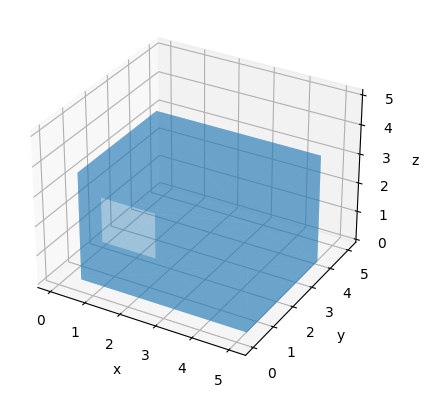

In [84]:
# Load the STL files and add the vectors to the plot
m1 = mesh.Mesh.from_file(STL_PATH)
plot_mesh(m1)

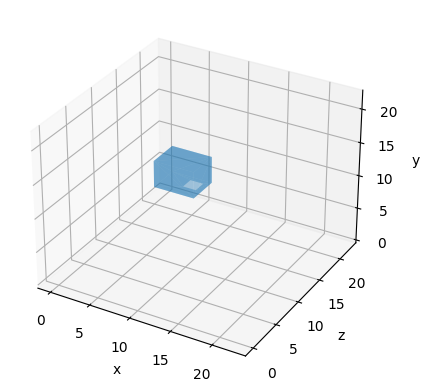

In [85]:
m1.rotate([1, 0, 0], math.radians(90))
m1.rotate([0, 1, 0], math.radians(180))



# move in (in x)  2*d  - width => 2*(3H) bc d = 3H
# move back (in z) 5 * height of the box 
height = 3.66 # TODO get from the stl...
width = 4.65
m1.translate([2*3*height - width, 0, 5*height] ) 


updated_convention = ["x", "z", "y"]
plot_mesh(m1, updated_convention) # convert axes naming to reflect openfoam block mesh convention...


In [86]:
SAVE_PATH = os.path.join(LOCATION_PATH, "box.stl")
m1.save(SAVE_PATH)